# Recasting of sleptons searches with compressed spectra

Based on arXiv:1712.0811 and their theoretical references:

[35] 1411.6043

[36] 1412.0618

[37] 1501.02511

Moreower there is   1706.05339 where all the $\Delta m$ cases are studied until 60 GeV. In figure 6 of [ATLAS-CONF-2017-039.pdf](http://inspirehep.net/record/1602531/files/ATLAS-CONF-2017-039.pdf) we chan chek that Run-II does not improve the minimum $\Delta m$ of the non-compressed search.

The sleptons cross sections at NLO-NLL are the ones in:

https://twiki.cern.ch/twiki/bin/view/LHCPhysics/SUSYCrossSections13TeVslepslep

For example:
```
m_{~e_L}=100 GeV -> 270.79 fb
m_{~e_R}=100 GeV -> 96.51 fb
```

So that

`xs= 2*(270.79 + 96.51) = 735 fb = 0.735 pb`

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('1712_08119.csv')

In [73]:
ex=df[df['xso/xsl']<1].reset_index(drop=True)

(0, 60)

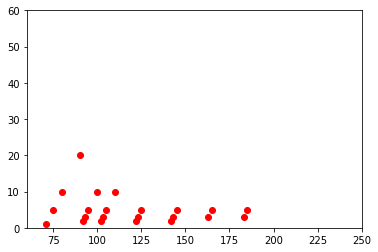

In [8]:
plt.plot(ex.MF,ex.DeltaM,'ro')
plt.xlim(60,250)
plt.ylim(0,60)

In [114]:
import subprocess
from cmdlike import *
ex=df.copy()
ex['xss']=0
for i in ex.index:
    MF=ex.loc[i,'MF']
    DeltaM=ex.loc[i,'DeltaM']
    print(i,MF,DeltaM)
    MS=MF-DeltaM
    
    # Prepare input SPHENO file:
    f=open('Input/LesHouches.in.SimplifiedDMSSSFDM_bak')
    l=f.read()
    f.close()
    ll=l.replace('4   1.9600000E+04    # MS2Input','4   %.8E    # MS2Input' %MS**2).replace(
                '5   1.5000000E+02    # MSFIN','5   %.8E    # MSFIN' %MF)
    
    f=open('LH.spc','w')
    f.write(ll)
    f.close()
    
    # Get madgraph input file
    kk=subprocess.Popen('./SimplifiedDM-SSSFDM-Toolbox/SPHENO/bin/SPhenoSimplifiedDMSSSFDM LH.spc'.split(),
                        stdout=subprocess.PIPE,stderr=subprocess.PIPE).communicate()
    
    # Run madgraph
    kk=subprocess.Popen('cp SPheno.spc.SimplifiedDMSSSFDM Run/direcorio_con_cards/param_card.dat'.split(),
                    stdout=subprocess.PIPE,stderr=subprocess.PIPE).communicate()

    kk=subprocess.Popen('../SimplifiedDM-SSSFDM-Toolbox/madgraph/bin/mg5_aMC FFlllaunch.mdg'.split(),
                    cwd='./Run',stdout=subprocess.PIPE,stderr=subprocess.PIPE).communicate()

    xss=kk[0].decode('utf8')
    if grep('Cross-section :',xss):
        xs=eval(grep('Cross-section :',xss).split(':')[1].strip().split()[0])
        ex.loc[i,'xss']=xs
        ex.to_csv('recast.csv',index=False)
    

0 100.0 10.0
1 101.0 1.0
2 102.0 2.0
3 103.0 3.0
4 105.0 5.0
5 105.0 15.0
6 110.0 10.0
7 110.0 40.0
8 115.0 15.0
9 115.0 25.0
10 120.0 60.0
11 120.0 50.0
12 120.0 40.0
13 120.0 30.0
14 121.0 1.0
15 122.0 2.0
16 123.0 3.0
17 125.0 25.0
18 125.0 5.0
19 130.0 10.0
20 130.0 40.0
21 135.0 15.0
22 140.0 40.0
23 140.0 20.0
24 141.0 1.0
25 142.0 2.0
26 143.0 3.0
27 145.0 25.0
28 145.0 5.0
29 150.0 10.0
30 155.0 15.0
31 160.0 60.0
32 160.0 40.0
33 160.0 20.0
34 161.0 1.0
35 162.0 2.0
36 163.0 3.0
37 165.0 25.0
38 165.0 5.0
39 170.0 10.0
40 180.0 60.0
41 180.0 40.0
42 180.0 20.0
43 181.0 1.0
44 182.0 2.0
45 183.0 3.0
46 185.0 25.0
47 185.0 5.0
48 190.0 10.0
49 195.0 15.0
50 200.0 60.0
51 200.0 40.0
52 200.0 20.0
53 201.0 1.0
54 202.0 2.0
55 205.0 25.0
56 205.0 5.0
57 210.0 10.0
58 220.0 60.0
59 220.0 40.0
60 220.0 20.0
61 240.0 60.0
62 251.0 1.0
63 255.0 5.0
64 260.0 10.0
65 270.0 20.0
66 71.0 1.0
67 75.0 5.0
68 80.0 10.0
69 90.0 60.0
70 90.0 50.0
71 90.0 40.0
72 90.0 30.0
73 90.0 25.0
74 90.0 2

In [ ]:
ex['xsl']=ex.xso/ex['xso/xsl']
ex=ex.sort_values('MF').reset_index(drop=True)

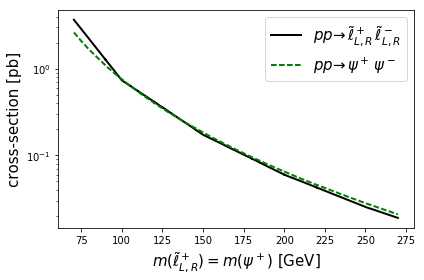

In [139]:
k=1
plt.semilogy(ex.MF,ex.xsl,'k-',lw=2,label=r'$pp\to \,\tilde{\ell}_{L,R}^+ \,\tilde{\ell}_{L,R}^-$')
plt.semilogy(ex.MF,ex.xss*k,'g--',lw=2,label=r'$pp\to \,\psi^+ \, \psi^-$')
plt.ylabel('cross-section [pb]',size=15)
plt.ylabel('cross-section [pb]',size=15)
plt.xlabel(r'$m(\tilde{\ell}_{L,R}^+)=m(\psi^+)$ [GeV]',size=15 )
a=plt.legend(loc='best',fontsize=15)
plt.tight_layout()
plt.savefig('cs.pdf')